Epoch 1/50
235/235 [==============================] - 5s 9ms/step - loss: 0.4094 - accuracy: 0.0059 - val_loss: 0.3543 - val_accuracy: 0.0086
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3461 - accuracy: 0.0107 - val_loss: 0.3330 - val_accuracy: 0.0128
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3344 - accuracy: 0.0122 - val_loss: 0.3273 - val_accuracy: 0.0144
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3299 - accuracy: 0.0134 - val_loss: 0.3238 - val_accuracy: 0.0131
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3271 - accuracy: 0.0133 - val_loss: 0.3216 - val_accuracy: 0.0152
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3251 - accuracy: 0.0148 - val_loss: 0.3204 - val_accuracy: 0.0150
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3233 - accuracy: 0.0154 - val_loss: 0.3189 - val_accuracy: 0.0177
Epoch 

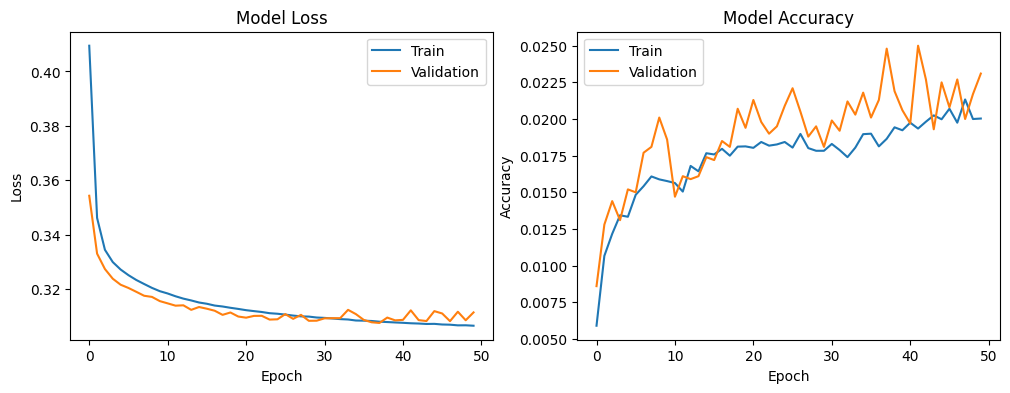

313/313 [==============================] - 1s 2ms/step


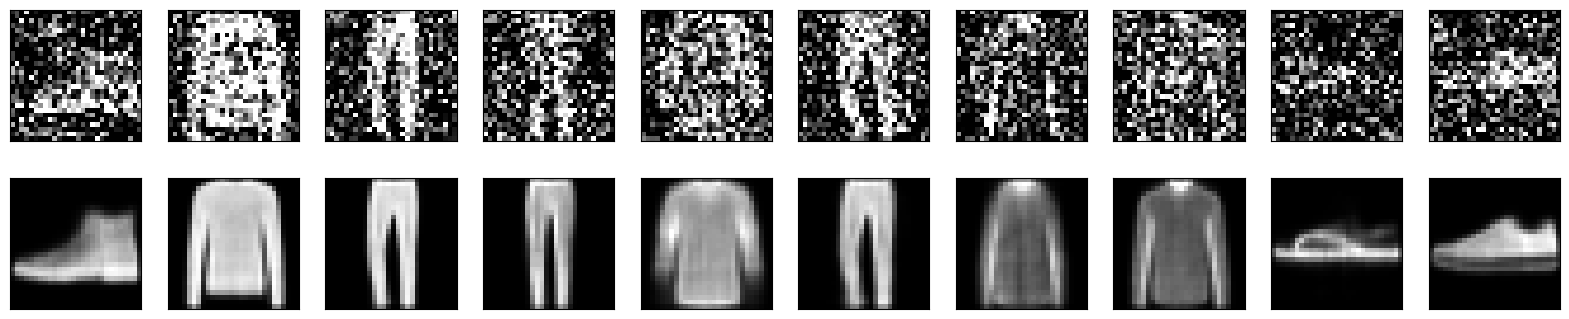

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Define the size of our encoded representations
encoding_dim = 32
hidden_layer_1 = 128
hidden_layer_2 = 64

# Define the input placeholder
input_img = Input(shape=(784,))

# Add a hidden layer
hidden_layer1 = Dense(hidden_layer_1, activation='relu')(input_img)
dropout1 = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(hidden_layer_2, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden_layer2)

# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(dropout2)

# Lossy reconstruction of the input
decoded_layer1 = Dense(hidden_layer_2, activation='relu')(encoded)
decoded_layer2 = Dense(hidden_layer_1, activation='relu')(decoded_layer1)
decoded = Dense(784, activation='sigmoid')(decoded_layer2)

# Model mapping an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder and save the training history
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Do the prediction on the test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize one of the reconstructed versions of the test data and its noisy counterpart
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
